# Lab 4: Data Visualization with Matplotlib

## Learning Objectives
By the end of this lab, you will be able to:
- Create various types of plots using matplotlib
- Customize plot appearance, colors, and styles
- Create subplots and complex figure layouts
- Add annotations, legends, and labels effectively
- Choose appropriate visualization types for different data
- Create publication-quality figures
- Understand matplotlib's object-oriented interface

## Introduction
Matplotlib is the foundational plotting library for Python. It provides fine-grained control over every aspect of a figure and serves as the backend for many other visualization libraries.

## Setup and Data Preparation

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, make_classification, make_regression
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style and parameters
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported and matplotlib configured successfully!")

Libraries imported and matplotlib configured successfully!


In [24]:
# Load and prepare datasets

# 1. Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target
iris_df['species_name'] = iris_df['species'].map(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 2. Synthetic time series data
dates = pd.date_range('2020-01-01', periods=365, freq='D')
trend = np.linspace(100, 150, 365)
seasonal = 10 * np.sin(2 * np.pi * np.arange(365) / 365 * 4)  # Quarterly seasonality
noise = np.random.normal(0, 5, 365)
values = trend + seasonal + noise

timeseries_df = pd.DataFrame({
    'date': dates,
    'value': values,
    'trend': trend,
    'seasonal': seasonal
})

# 3. Synthetic regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
regression_df = pd.DataFrame({
    'x': X_reg.flatten(),
    'y': y_reg
})

# 4. Sample business data
categories = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
sales_data = {
    'Q1': [150, 120, 180, 90, 200],
    'Q2': [160, 135, 190, 85, 220],
    'Q3': [140, 110, 200, 95, 210],
    'Q4': [180, 145, 175, 100, 235]
}
sales_df = pd.DataFrame(sales_data, index=categories)

print("Datasets prepared:")
print(f"- Iris dataset: {iris_df.shape}")
print(f"- Time series data: {timeseries_df.shape}")
print(f"- Regression data: {regression_df.shape}")
print(f"- Sales data: {sales_df.shape}")

Datasets prepared:
- Iris dataset: (150, 6)
- Time series data: (365, 4)
- Regression data: (100, 2)
- Sales data: (5, 4)


## 1. Basic Plot Types

### Line Plots

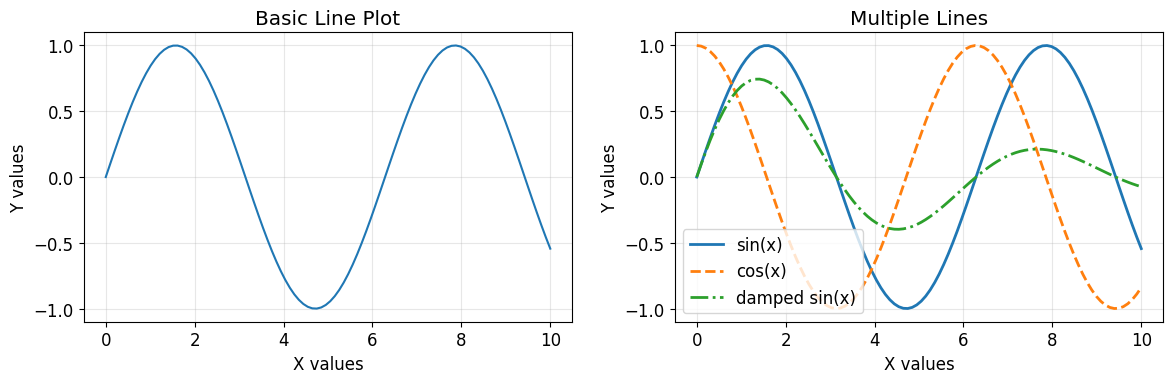

In [25]:
# Basic line plot
plt.figure(figsize=(12, 4))

# Simple line plot
plt.subplot(1, 2, 1)
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)
plt.title('Basic Line Plot')
plt.xlabel('X values')
plt.ylabel('Y values')

# Multiple lines
plt.subplot(1, 2, 2)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(-x/5)

plt.plot(x, y1, label='sin(x)', linewidth=2)
plt.plot(x, y2, label='cos(x)', linestyle='--', linewidth=2)
plt.plot(x, y3, label='damped sin(x)', linestyle='-.', linewidth=2)

plt.title('Multiple Lines')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()

plt.tight_layout()
plt.show()

### Scatter Plots

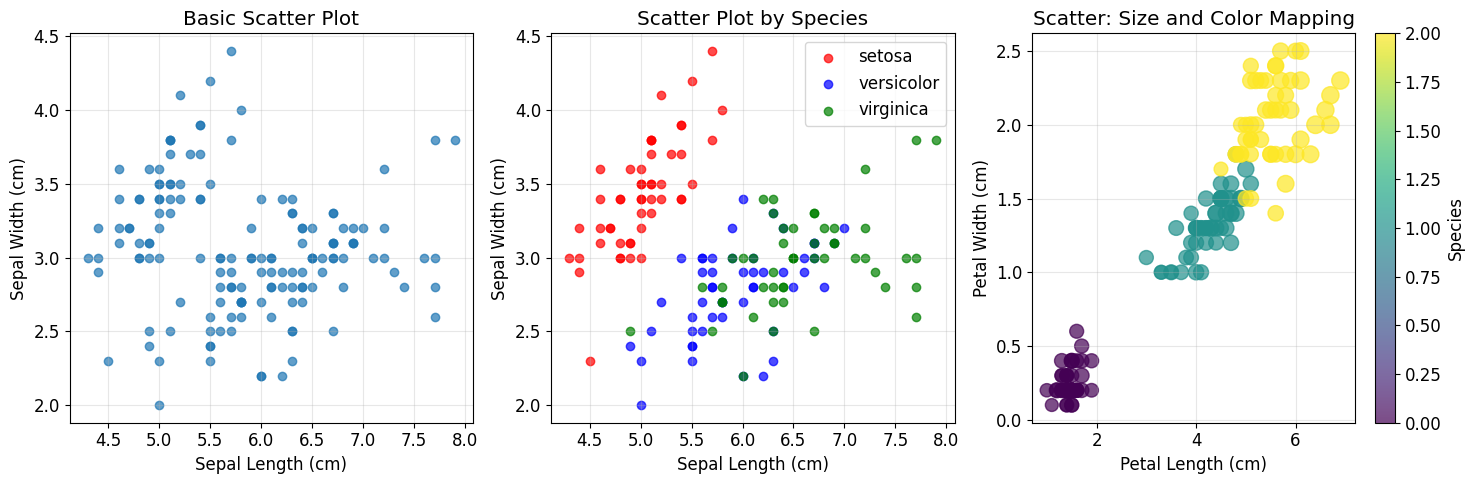

In [26]:
# Scatter plots with iris data
plt.figure(figsize=(15, 5))

# Basic scatter plot
plt.subplot(1, 3, 1)
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Basic Scatter Plot')

# Colored by species
plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green']
species_names = iris_df['species_name'].unique()

for i, species in enumerate(species_names):
    species_data = iris_df[iris_df['species_name'] == species]
    plt.scatter(
        species_data['sepal length (cm)'], 
        species_data['sepal width (cm)'],
        c=colors[i], 
        label=species, 
        alpha=0.7
    )

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot by Species')
plt.legend()

# Size and color mapping
plt.subplot(1, 3, 3)
scatter = plt.scatter(
    iris_df['petal length (cm)'], 
    iris_df['petal width (cm)'],
    c=iris_df['species'], 
    s=iris_df['sepal length (cm)'] * 20,  # Size based on sepal length
    alpha=0.7,
    cmap='viridis'
)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter: Size and Color Mapping')
plt.colorbar(scatter, label='Species')

plt.tight_layout()
plt.show()

### Bar Plots

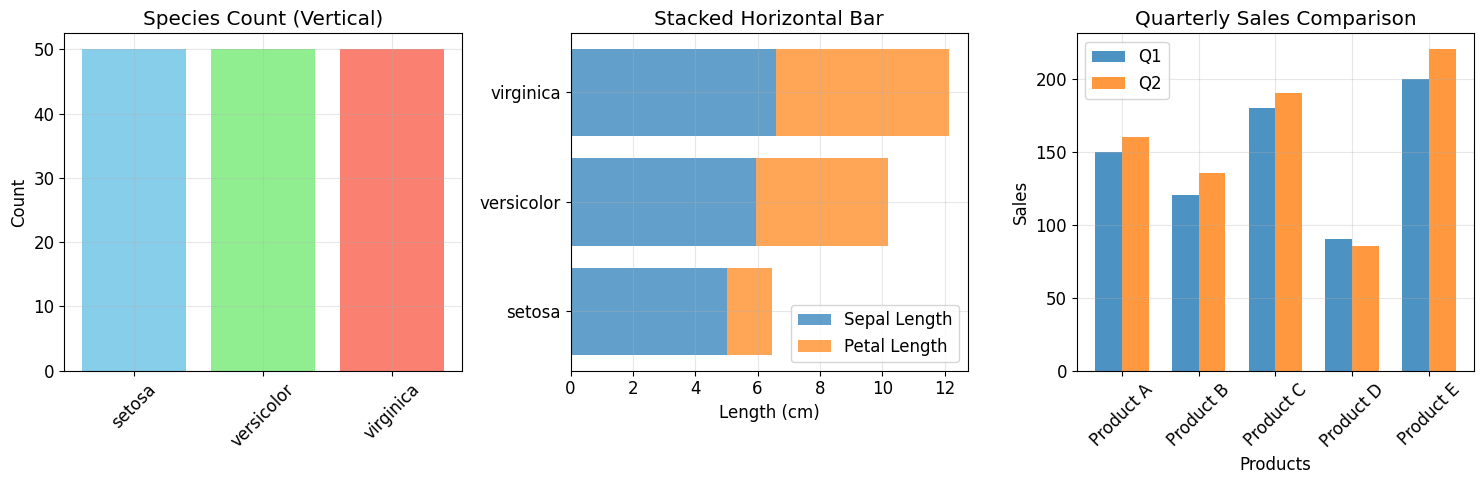

In [27]:
# Bar plots
plt.figure(figsize=(15, 5))

# Vertical bar plot
plt.subplot(1, 3, 1)
species_counts = iris_df['species_name'].value_counts()
plt.bar(species_counts.index, species_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Species Count (Vertical)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Horizontal bar plot
plt.subplot(1, 3, 2)
mean_measurements = iris_df.groupby('species_name')[['sepal length (cm)', 'petal length (cm)']].mean()
plt.barh(mean_measurements.index, mean_measurements['sepal length (cm)'], 
         alpha=0.7, label='Sepal Length')
plt.barh(mean_measurements.index, mean_measurements['petal length (cm)'], 
         alpha=0.7, label='Petal Length', left=mean_measurements['sepal length (cm)'])
plt.title('Stacked Horizontal Bar')
plt.xlabel('Length (cm)')
plt.legend()

# Grouped bar plot
plt.subplot(1, 3, 3)
x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, sales_df['Q1'], width, label='Q1', alpha=0.8)
plt.bar(x + width/2, sales_df['Q2'], width, label='Q2', alpha=0.8)

plt.title('Quarterly Sales Comparison')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.xticks(x, categories, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Exercise 1: Basic Plots
Create the following plots:
1. A line plot showing the trend component of the time series data
2. A scatter plot of the regression data with a trend line
3. A bar plot showing the total sales by product (sum across all quarters)

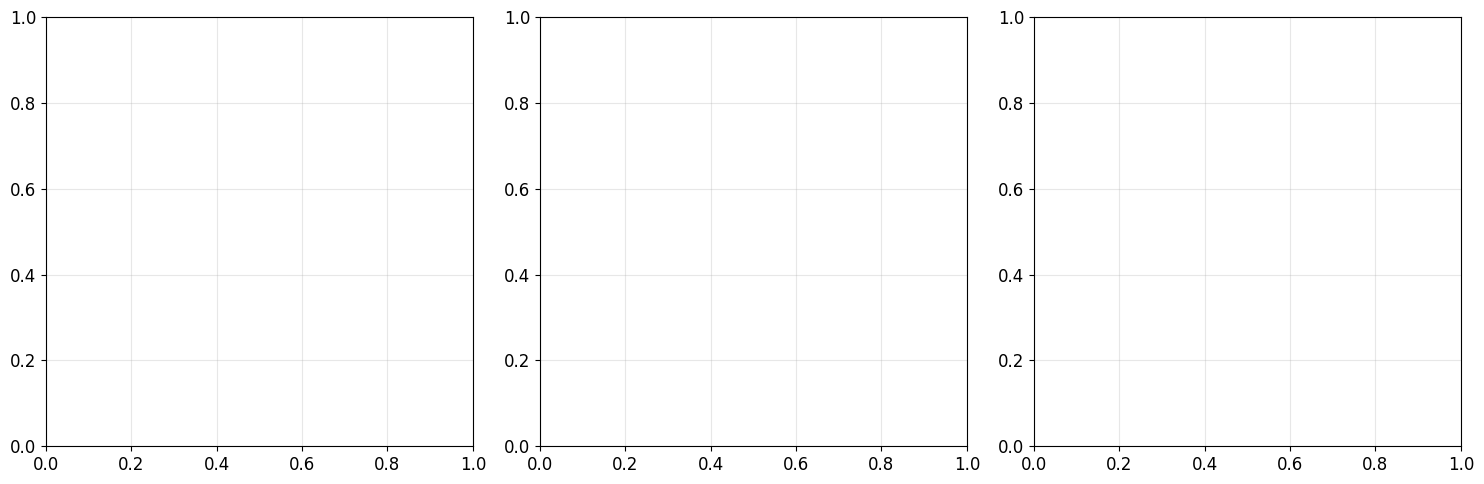

In [28]:
# Your code here
plt.figure(figsize=(15, 5))

# Task 1: Line plot of trend
plt.subplot(1, 3, 1)
# Your code here

# Task 2: Scatter plot with trend line
plt.subplot(1, 3, 2)
# Your code here

# Task 3: Bar plot of total sales
plt.subplot(1, 3, 3)
# Your code here

plt.tight_layout()
plt.show()

## 2. Histograms and Distributions

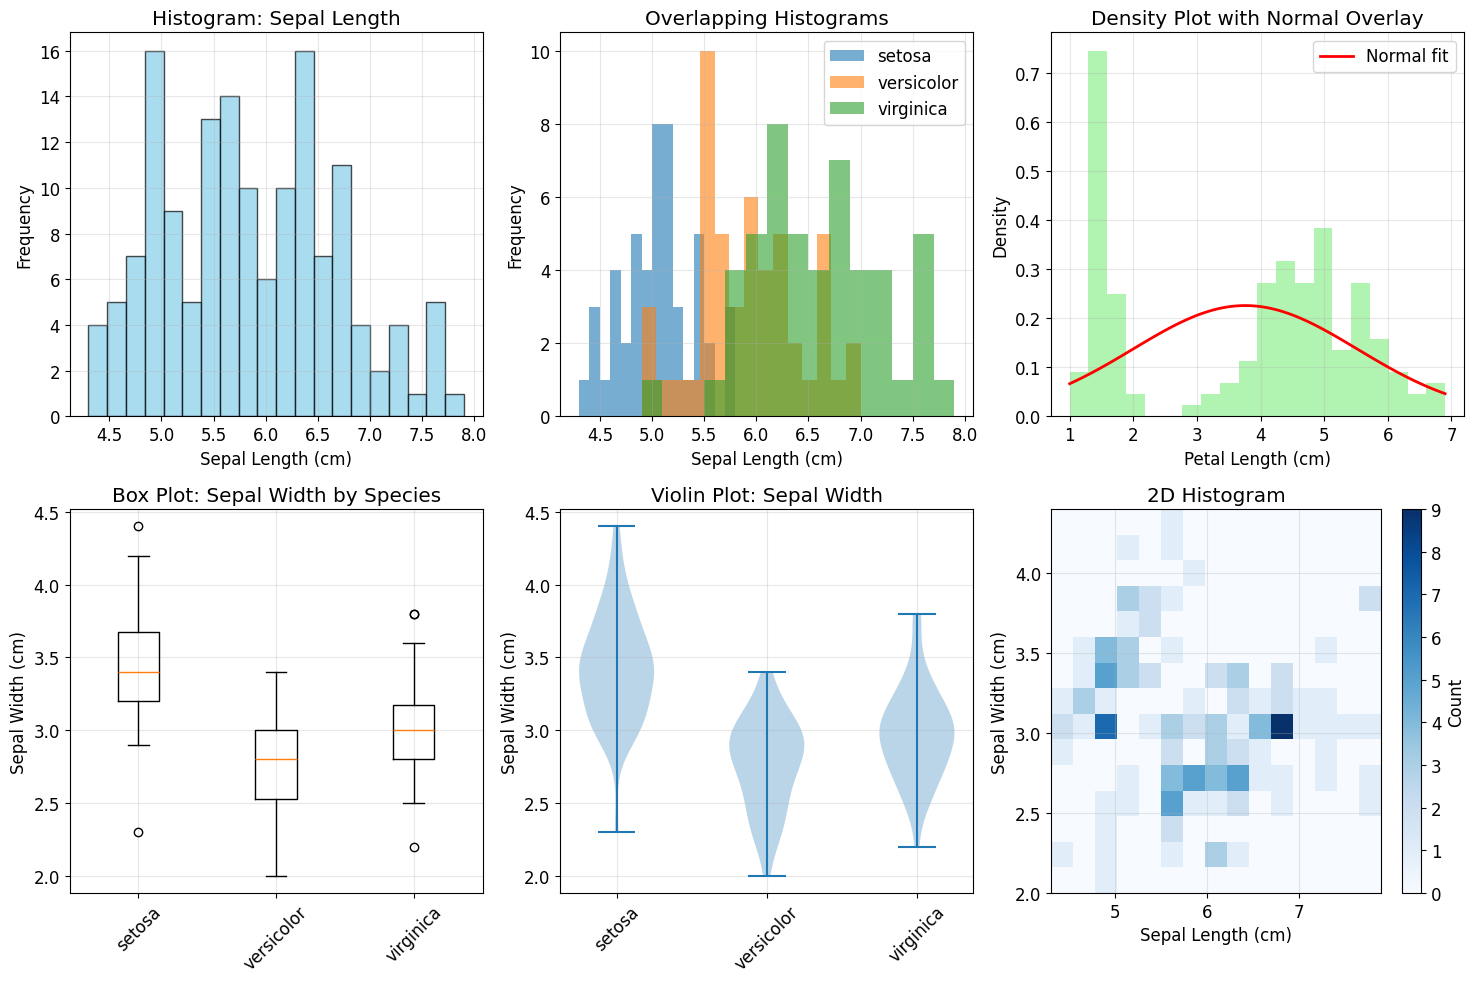

In [29]:
# Histograms and distributions
plt.figure(figsize=(15, 10))

# Basic histogram
plt.subplot(2, 3, 1)
plt.hist(iris_df['sepal length (cm)'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram: Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Multiple histograms
plt.subplot(2, 3, 2)
for species in iris_df['species_name'].unique():
    data = iris_df[iris_df['species_name'] == species]['sepal length (cm)']
    plt.hist(data, alpha=0.6, label=species, bins=15)

plt.title('Overlapping Histograms')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()

# Density plot (using histogram with density=True)
plt.subplot(2, 3, 3)
plt.hist(iris_df['petal length (cm)'], bins=20, density=True, alpha=0.7, color='lightgreen')

# Add normal distribution overlay
x = np.linspace(iris_df['petal length (cm)'].min(), iris_df['petal length (cm)'].max(), 100)
mu, sigma = iris_df['petal length (cm)'].mean(), iris_df['petal length (cm)'].std()
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal fit')

plt.title('Density Plot with Normal Overlay')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Density')
plt.legend()

# Box plot
plt.subplot(2, 3, 4)
species_data = [iris_df[iris_df['species_name'] == species]['sepal width (cm)'] 
                for species in iris_df['species_name'].unique()]
plt.boxplot(species_data, labels=iris_df['species_name'].unique())
plt.title('Box Plot: Sepal Width by Species')
plt.ylabel('Sepal Width (cm)')
plt.xticks(rotation=45)

# Violin plot (manual implementation)
plt.subplot(2, 3, 5)
parts = plt.violinplot(species_data, positions=range(1, 4))
plt.xticks(range(1, 4), iris_df['species_name'].unique(), rotation=45)
plt.title('Violin Plot: Sepal Width')
plt.ylabel('Sepal Width (cm)')

# 2D histogram
plt.subplot(2, 3, 6)
plt.hist2d(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], bins=15, cmap='Blues')
plt.title('2D Histogram')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(label='Count')

plt.tight_layout()
plt.show()

### Exercise 2: Distributions
Create the following visualizations:
1. A histogram of the time series values with 30 bins
2. Box plots comparing all four iris measurements side by side
3. A 2D histogram of petal length vs petal width

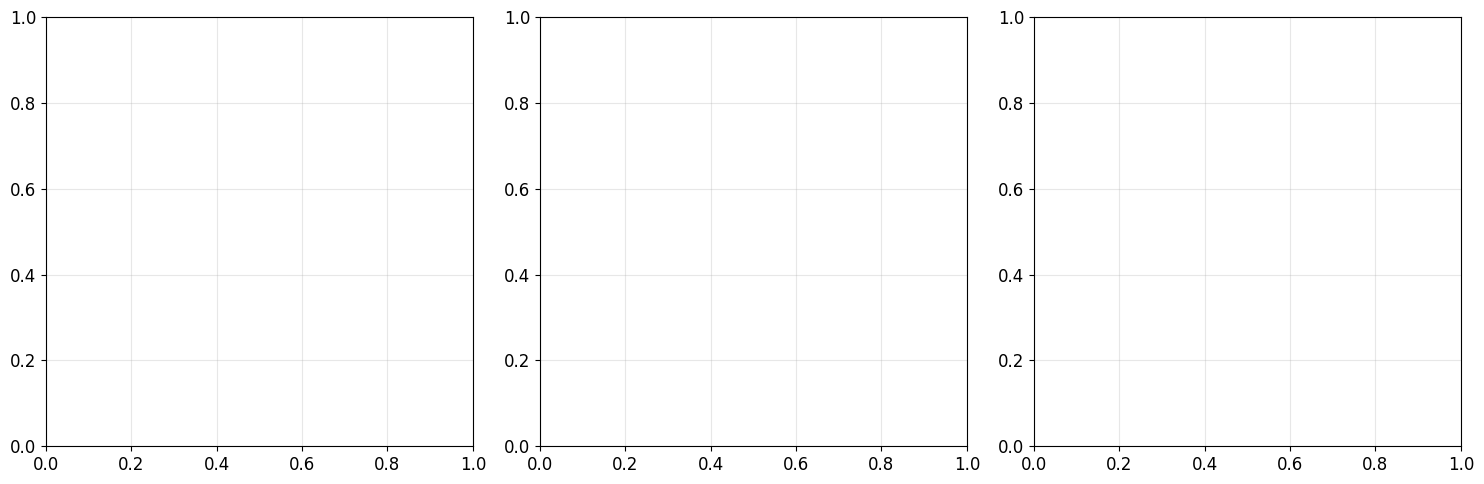

In [30]:
# Your code here
plt.figure(figsize=(15, 5))

# Task 1: Histogram of time series values
plt.subplot(1, 3, 1)
# Your code here

# Task 2: Box plots of all iris measurements
plt.subplot(1, 3, 2)
# Your code here

# Task 3: 2D histogram of petal measurements
plt.subplot(1, 3, 3)
# Your code here

plt.tight_layout()
plt.show()

## 3. Time Series Visualization

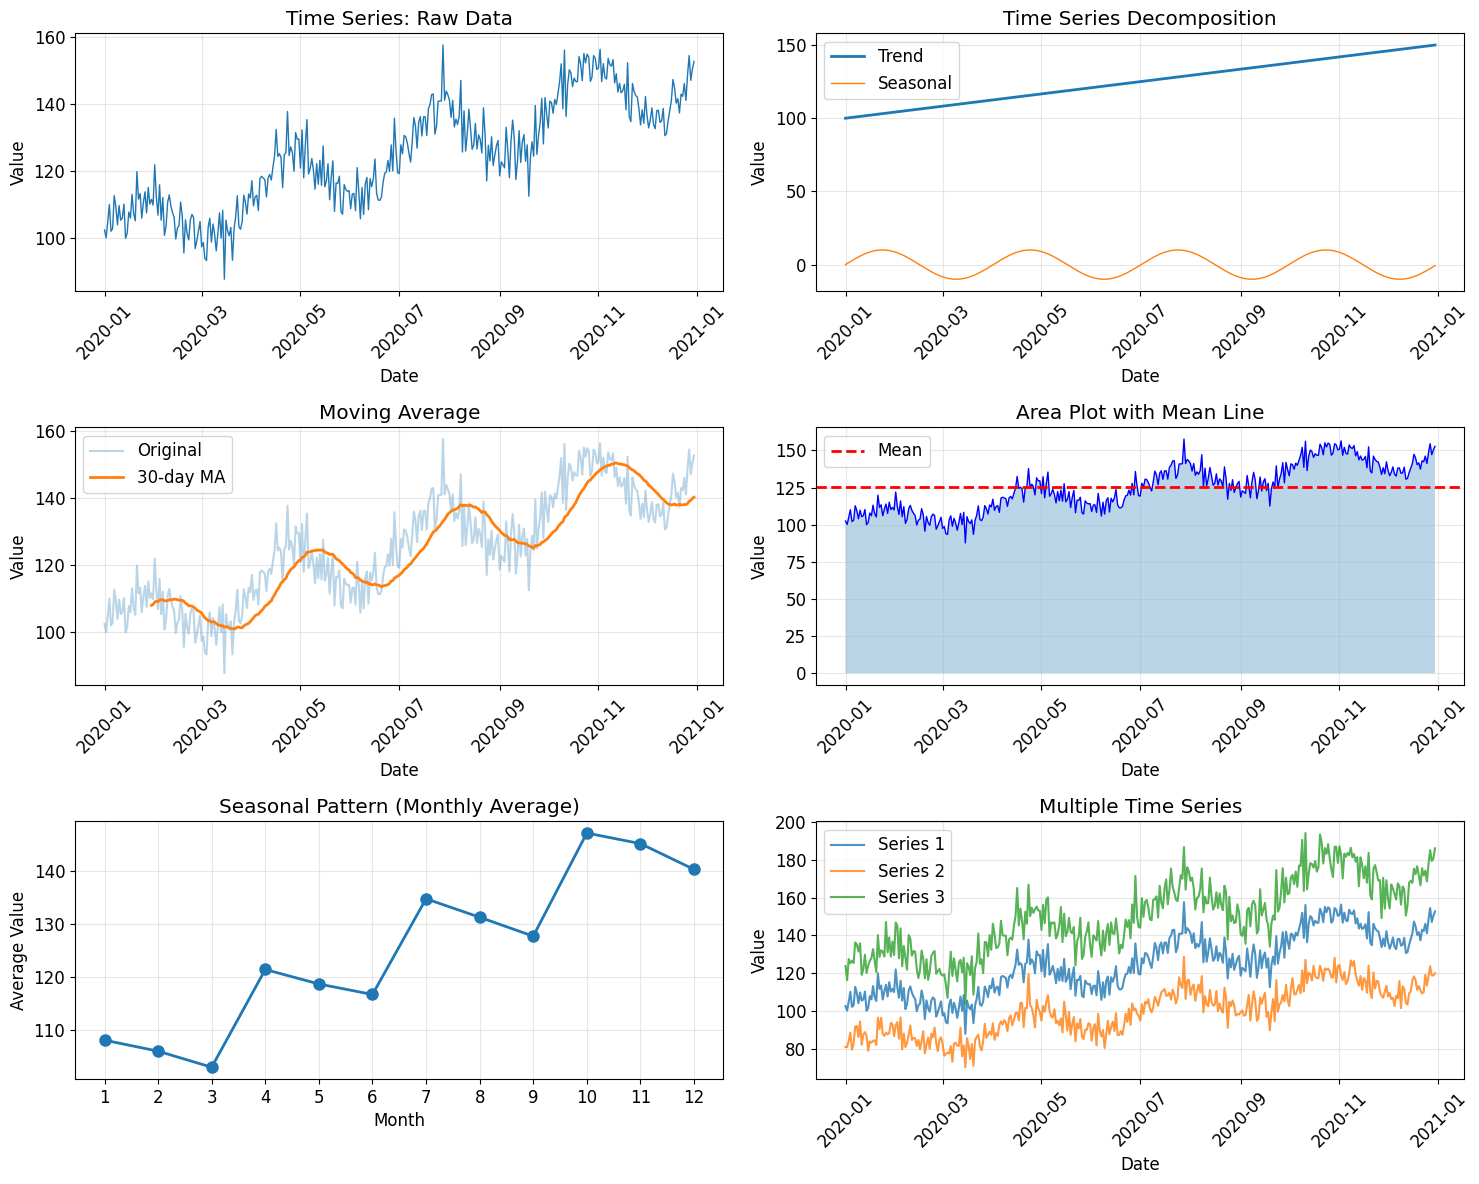

In [31]:
# Time series visualizations
plt.figure(figsize=(15, 12))

# Basic time series plot
plt.subplot(3, 2, 1)
plt.plot(timeseries_df['date'], timeseries_df['value'], linewidth=1)
plt.title('Time Series: Raw Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Decomposed time series
plt.subplot(3, 2, 2)
plt.plot(timeseries_df['date'], timeseries_df['trend'], label='Trend', linewidth=2)
plt.plot(timeseries_df['date'], timeseries_df['seasonal'], label='Seasonal', linewidth=1)
plt.title('Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Moving average
plt.subplot(3, 2, 3)
window = 30
moving_avg = timeseries_df['value'].rolling(window=window).mean()
plt.plot(timeseries_df['date'], timeseries_df['value'], alpha=0.3, label='Original')
plt.plot(timeseries_df['date'], moving_avg, linewidth=2, label=f'{window}-day MA')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Fill between
plt.subplot(3, 2, 4)
plt.plot(timeseries_df['date'], timeseries_df['value'], 'b-', linewidth=1)
plt.fill_between(timeseries_df['date'], timeseries_df['value'], alpha=0.3)
plt.axhline(y=timeseries_df['value'].mean(), color='r', linestyle='--', 
           linewidth=2, label='Mean')
plt.title('Area Plot with Mean Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Seasonal pattern (monthly aggregation)
plt.subplot(3, 2, 5)
monthly_data = timeseries_df.copy()
monthly_data['month'] = monthly_data['date'].dt.month
monthly_avg = monthly_data.groupby('month')['value'].mean()

plt.plot(monthly_avg.index, monthly_avg.values, 'o-', linewidth=2, markersize=8)
plt.title('Seasonal Pattern (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# Multiple time series
plt.subplot(3, 2, 6)
# Create multiple series
ts1 = timeseries_df['value']
ts2 = timeseries_df['value'] * 0.8 + np.random.normal(0, 3, len(timeseries_df))
ts3 = timeseries_df['value'] * 1.2 + np.random.normal(0, 4, len(timeseries_df))

plt.plot(timeseries_df['date'], ts1, label='Series 1', alpha=0.8)
plt.plot(timeseries_df['date'], ts2, label='Series 2', alpha=0.8)
plt.plot(timeseries_df['date'], ts3, label='Series 3', alpha=0.8)

plt.title('Multiple Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Exercise 3: Time Series
Create the following time series visualizations:
1. A subplot showing the original data and its 7-day and 30-day moving averages
2. A quarterly aggregation plot (sum of values by quarter)
3. A plot highlighting weekends vs weekdays (if applicable to your data)

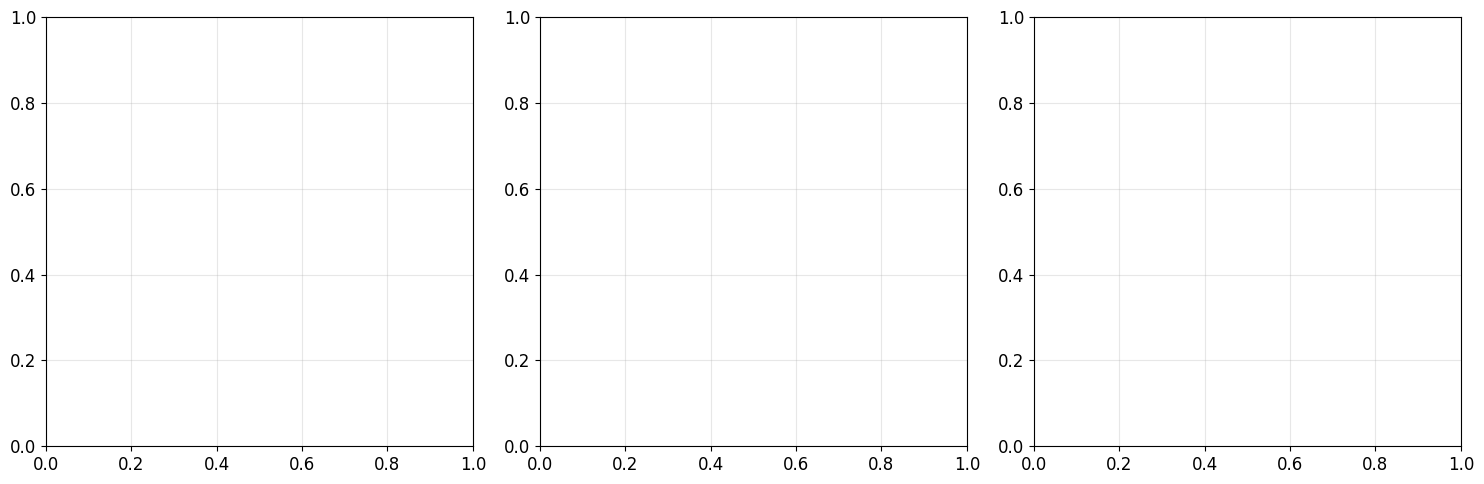

In [32]:
# Your code here
plt.figure(figsize=(15, 5))

# Task 1: Moving averages comparison
plt.subplot(1, 3, 1)
# Your code here

# Task 2: Quarterly aggregation
plt.subplot(1, 3, 2)
# Your code here

# Task 3: Weekends vs weekdays (or day of week pattern)
plt.subplot(1, 3, 3)
# Your code here

plt.tight_layout()
plt.show()

## 4. Customization and Styling

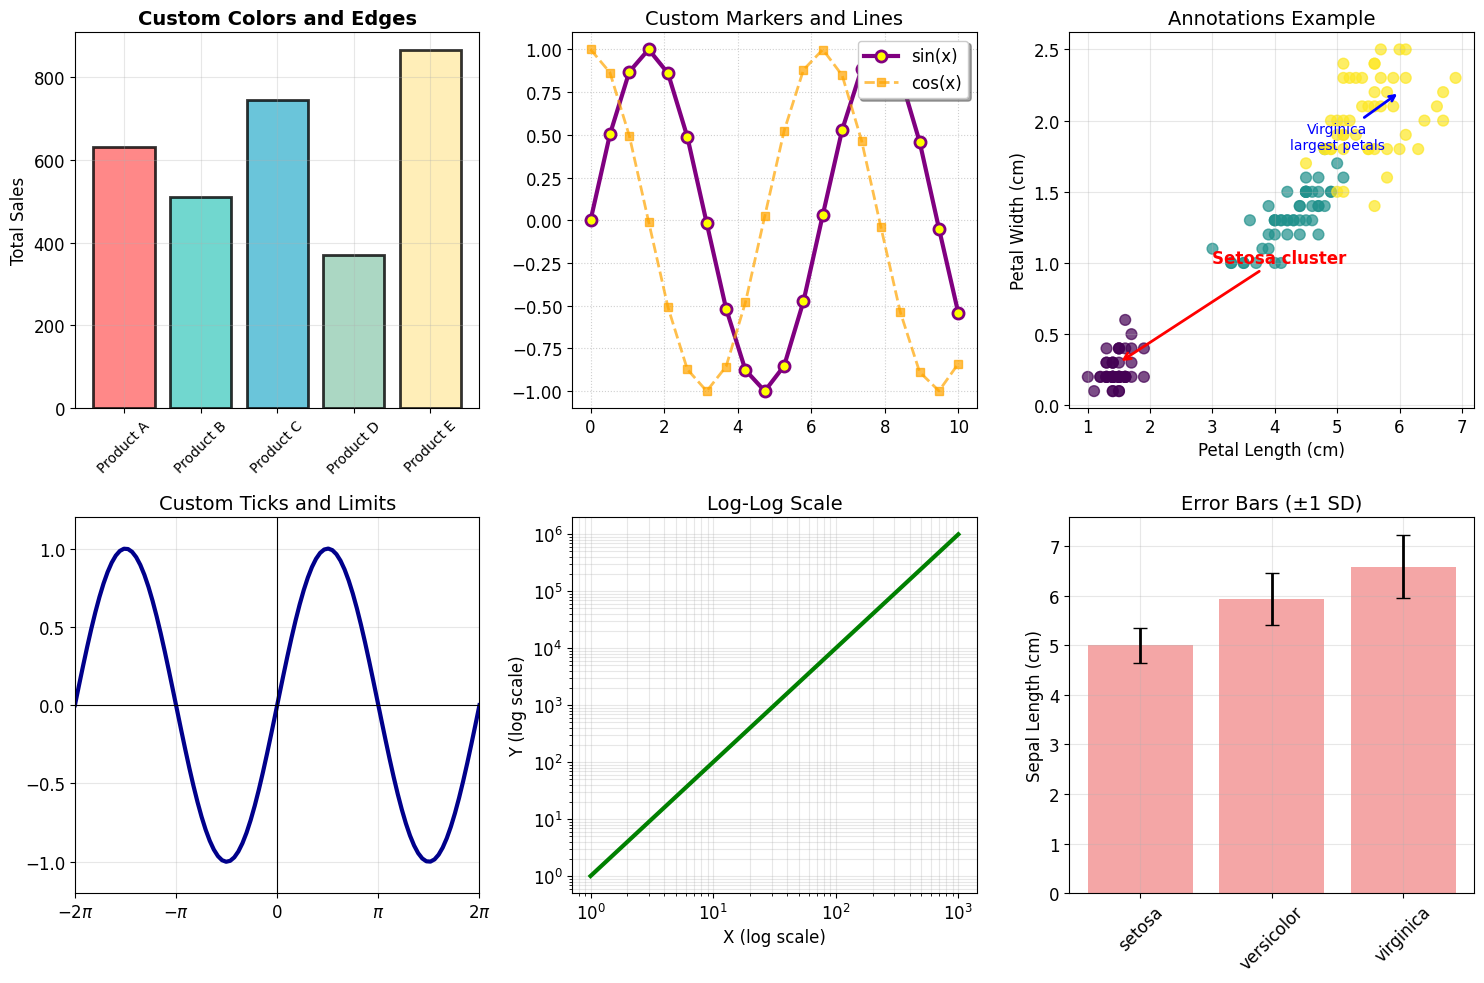

In [33]:
# Advanced customization
plt.figure(figsize=(15, 10))

# Custom colors and styles
plt.subplot(2, 3, 1)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.bar(categories, sales_df.sum(axis=1), color=colors, alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Custom Colors and Edges', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Custom markers and line styles
plt.subplot(2, 3, 2)
x = np.linspace(0, 10, 20)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, 'o-', linewidth=3, markersize=8, color='purple', 
         markerfacecolor='yellow', markeredgecolor='purple', markeredgewidth=2, label='sin(x)')
plt.plot(x, y2, 's--', linewidth=2, markersize=6, color='orange', alpha=0.7, label='cos(x)')

plt.title('Custom Markers and Lines', fontsize=14)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.6)

# Custom text and annotations
plt.subplot(2, 3, 3)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], 
           c=iris_df['species'], cmap='viridis', s=60, alpha=0.7)

# Add annotations
plt.annotate('Setosa cluster', xy=(1.5, 0.3), xytext=(3, 1),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

plt.annotate('Virginica\nlargest petals', xy=(6, 2.2), xytext=(5, 1.8),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2),
            fontsize=10, color='blue', ha='center')

plt.title('Annotations Example', fontsize=14)
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)

# Custom axis limits and ticks
plt.subplot(2, 3, 4)
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y, linewidth=3, color='darkblue')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=0, color='black', linewidth=0.8)

# Custom ticks
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi], 
           [r'$-2\pi$', r'$-\pi$', '0', r'$\pi$', r'$2\pi$'])
plt.yticks([-1, -0.5, 0, 0.5, 1])

plt.xlim(-2*np.pi, 2*np.pi)
plt.ylim(-1.2, 1.2)
plt.title('Custom Ticks and Limits', fontsize=14)
plt.grid(True, alpha=0.3)

# Subplots with different scales
plt.subplot(2, 3, 5)
x = np.logspace(0, 3, 100)
y = x**2

plt.loglog(x, y, linewidth=3, color='green')
plt.title('Log-Log Scale', fontsize=14)
plt.xlabel('X (log scale)', fontsize=12)
plt.ylabel('Y (log scale)', fontsize=12)
plt.grid(True, which='both', alpha=0.3)

# Error bars and confidence intervals
plt.subplot(2, 3, 6)
species_means = iris_df.groupby('species_name')['sepal length (cm)'].mean()
species_std = iris_df.groupby('species_name')['sepal length (cm)'].std()

x_pos = range(len(species_means))
plt.bar(x_pos, species_means.values, yerr=species_std.values, 
        capsize=5, alpha=0.7, color='lightcoral', 
        error_kw={'elinewidth': 2, 'ecolor': 'black'})

plt.xticks(x_pos, species_means.index, rotation=45)
plt.title('Error Bars (±1 SD)', fontsize=14)
plt.ylabel('Sepal Length (cm)', fontsize=12)

plt.tight_layout()
plt.show()

### Exercise 4: Customization
Create a highly customized plot with the following features:
1. A scatter plot with custom colors, markers, and sizes
2. Custom axis labels with mathematical notation
3. Annotations pointing to interesting data points
4. A custom legend with specific positioning

In [34]:
# Your code here - create a highly customized plot
plt.figure(figsize=(10, 8))

# Your customized plot here

plt.show()

<Figure size 1000x800 with 0 Axes>

## 5. Subplots and Complex Layouts

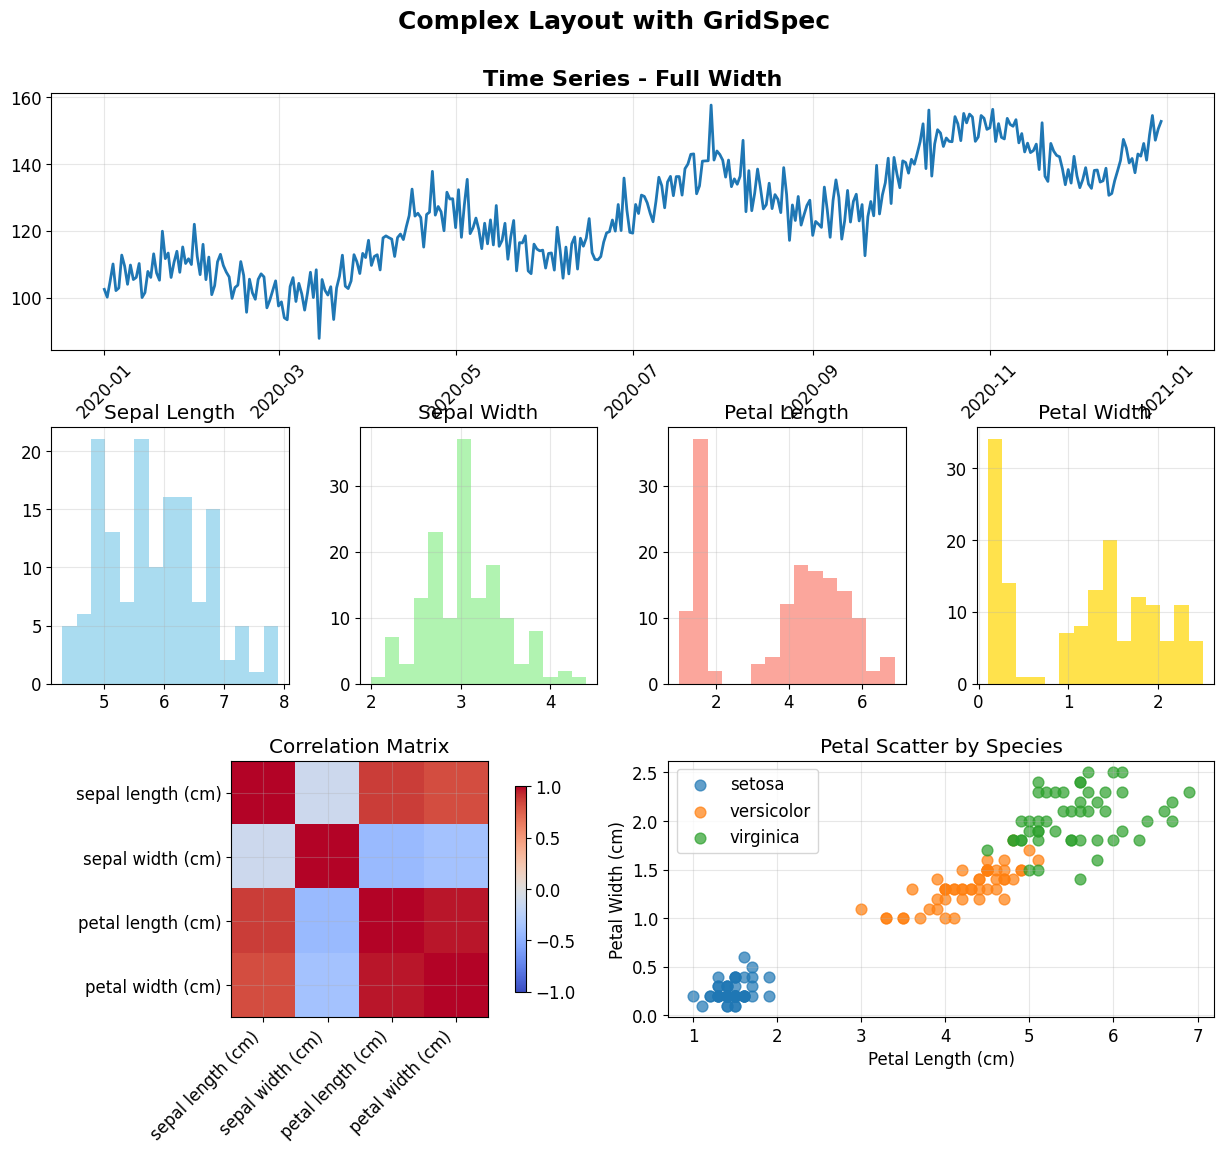

In [35]:
# Complex subplot layouts

# Using gridspec for complex layouts
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

# Large subplot spanning multiple cells
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(timeseries_df['date'], timeseries_df['value'], linewidth=2)
ax1.set_title('Time Series - Full Width', fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Regular subplots
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(iris_df['sepal length (cm)'], bins=15, alpha=0.7, color='skyblue')
ax2.set_title('Sepal Length')

ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(iris_df['sepal width (cm)'], bins=15, alpha=0.7, color='lightgreen')
ax3.set_title('Sepal Width')

ax4 = fig.add_subplot(gs[1, 2])
ax4.hist(iris_df['petal length (cm)'], bins=15, alpha=0.7, color='salmon')
ax4.set_title('Petal Length')

ax5 = fig.add_subplot(gs[1, 3])
ax5.hist(iris_df['petal width (cm)'], bins=15, alpha=0.7, color='gold')
ax5.set_title('Petal Width')

# Tall subplot
ax6 = fig.add_subplot(gs[2, :2])
correlation_matrix = iris_df[['sepal length (cm)', 'sepal width (cm)', 
                             'petal length (cm)', 'petal width (cm)']].corr()
im = ax6.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax6.set_xticks(range(len(correlation_matrix.columns)))
ax6.set_yticks(range(len(correlation_matrix.columns)))
ax6.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax6.set_yticklabels(correlation_matrix.columns)
ax6.set_title('Correlation Matrix')

# Add colorbar
cbar = plt.colorbar(im, ax=ax6, shrink=0.8)

# Scatter plot
ax7 = fig.add_subplot(gs[2, 2:])
for i, species in enumerate(iris_df['species_name'].unique()):
    species_data = iris_df[iris_df['species_name'] == species]
    ax7.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'],
               label=species, alpha=0.7, s=60)

ax7.set_xlabel('Petal Length (cm)')
ax7.set_ylabel('Petal Width (cm)')
ax7.set_title('Petal Scatter by Species')
ax7.legend()
ax7.grid(True, alpha=0.3)

plt.suptitle('Complex Layout with GridSpec', fontsize=18, fontweight='bold', y=0.95)
plt.show()

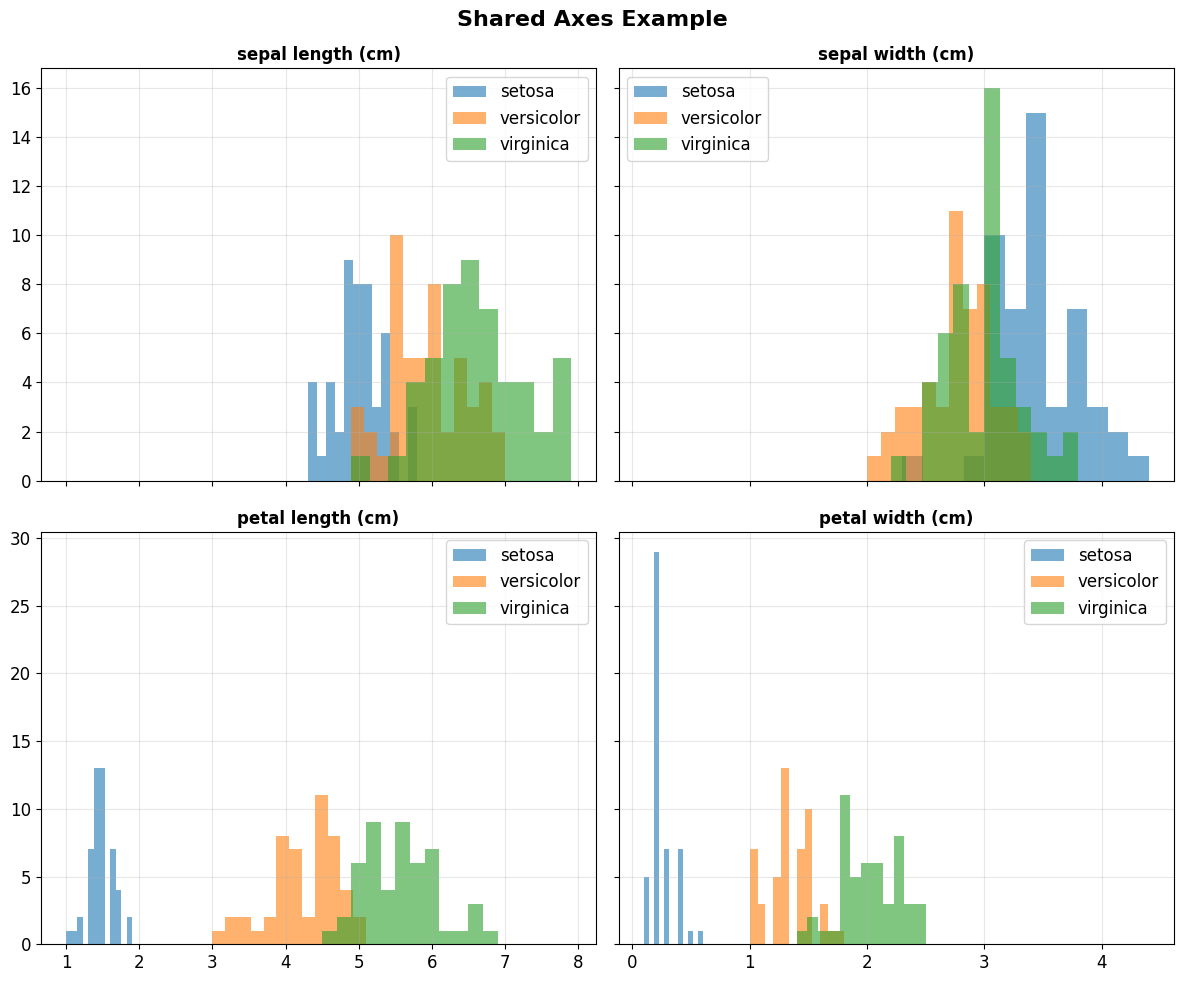

In [36]:
# Subplots with shared axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex='col', sharey='row')

# Plot data on each subplot
species_names = iris_df['species_name'].unique()
measurements = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        if idx < len(measurements):
            for species in species_names:
                species_data = iris_df[iris_df['species_name'] == species]
                axes[i, j].hist(species_data[measurements[idx]], alpha=0.6, 
                               label=species, bins=12)
            
            axes[i, j].set_title(measurements[idx], fontsize=12, fontweight='bold')
            axes[i, j].legend()
            axes[i, j].grid(True, alpha=0.3)

plt.suptitle('Shared Axes Example', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Exercise 5: Complex Layouts
Create a complex layout using GridSpec with:
1. A main plot that spans the top row
2. Three smaller plots in the bottom row
3. Proper spacing and titles
4. At least one shared axis between subplots

In [37]:
# Your code here - create a complex layout
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 10))
# Your GridSpec layout here

plt.show()

<Figure size 1500x1000 with 0 Axes>

## 6. Statistical Plots and Regression

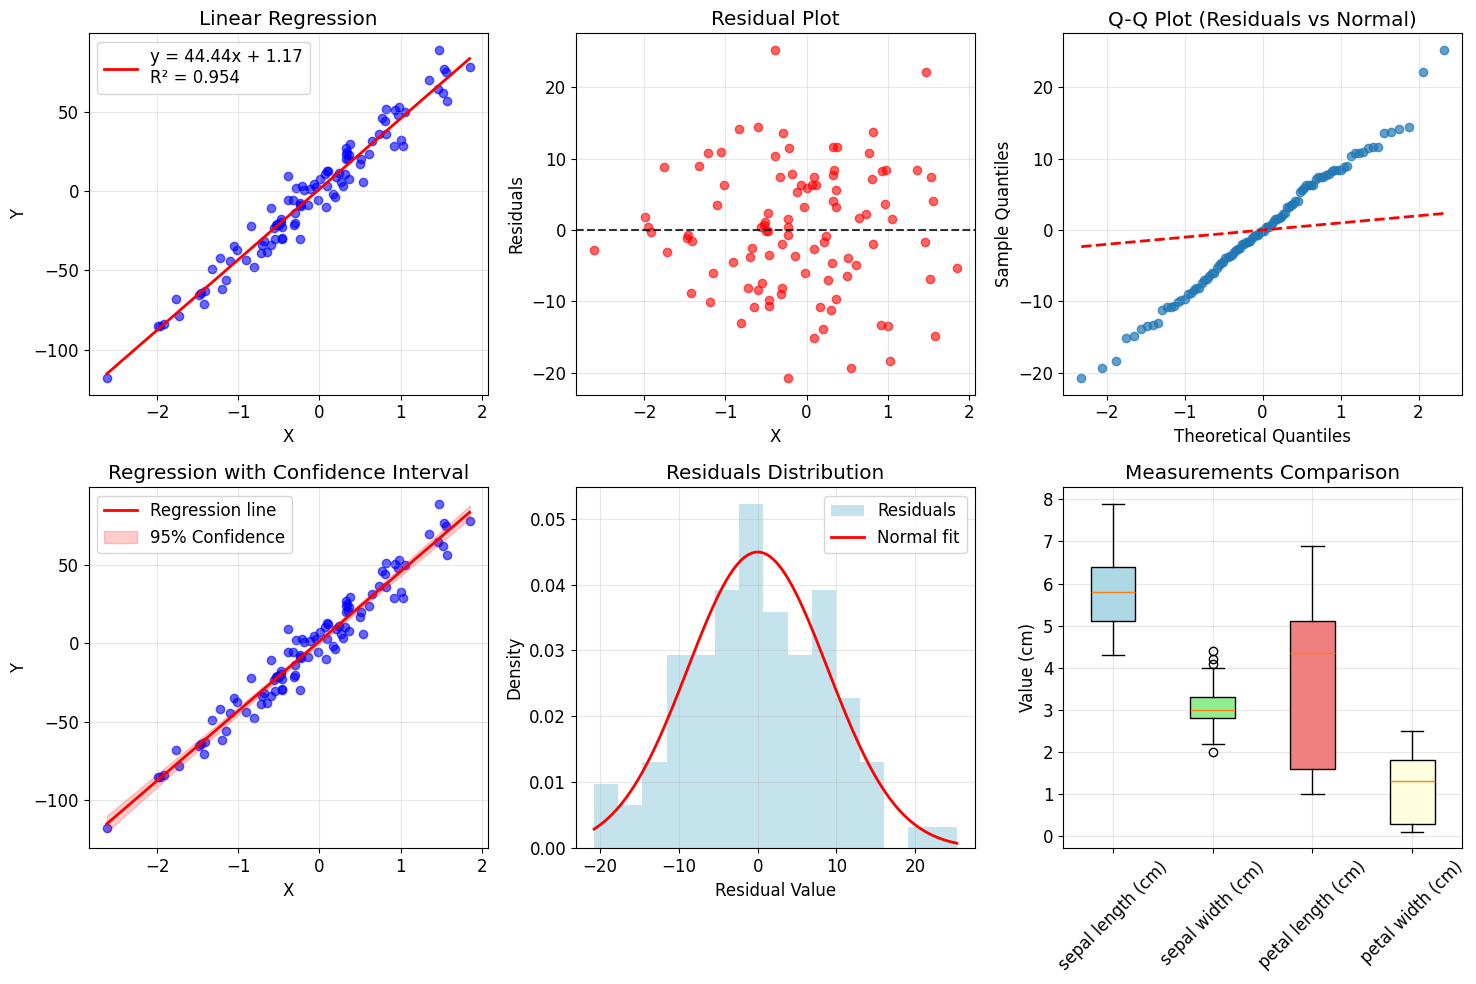

In [38]:
# Statistical visualization
plt.figure(figsize=(15, 10))

# Regression plot
plt.subplot(2, 3, 1)
x = regression_df['x']
y = regression_df['y']

# Scatter plot
plt.scatter(x, y, alpha=0.6, color='blue')

# Fit regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line_x = np.linspace(x.min(), x.max(), 100)
line_y = slope * line_x + intercept

plt.plot(line_x, line_y, 'r-', linewidth=2, 
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(2, 3, 2)
residuals = y - (slope * x + intercept)
plt.scatter(x, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.8)
plt.title('Residual Plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)

# Q-Q plot (quantile-quantile)
plt.subplot(2, 3, 3)
sorted_residuals = np.sort(residuals)
theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(sorted_residuals)))

plt.scatter(theoretical_quantiles, sorted_residuals, alpha=0.7)
plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', linewidth=2)
plt.title('Q-Q Plot (Residuals vs Normal)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, alpha=0.3)

# Confidence intervals
plt.subplot(2, 3, 4)
plt.scatter(x, y, alpha=0.6, color='blue')
plt.plot(line_x, line_y, 'r-', linewidth=2, label='Regression line')

# Calculate confidence interval
from scipy import stats as scipy_stats
n = len(x)
t_val = scipy_stats.t.ppf(0.975, n-2)  # 95% confidence
s_err = np.sqrt(np.sum(residuals**2) / (n-2))

# Simplified confidence interval calculation
conf_interval = t_val * s_err * np.sqrt(1/n + (line_x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))

plt.fill_between(line_x, line_y - conf_interval, line_y + conf_interval, 
                alpha=0.2, color='red', label='95% Confidence')

plt.title('Regression with Confidence Interval')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribution comparison
plt.subplot(2, 3, 5)
# Compare actual residuals to normal distribution
plt.hist(residuals, bins=15, density=True, alpha=0.7, color='lightblue', 
         label='Residuals')

# Overlay normal distribution
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
normal_dist = stats.norm.pdf(x_norm, residuals.mean(), residuals.std())
plt.plot(x_norm, normal_dist, 'r-', linewidth=2, label='Normal fit')

plt.title('Residuals Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot comparison
plt.subplot(2, 3, 6)
measurements = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data_for_boxplot = [iris_df[col] for col in measurements]

box_plot = plt.boxplot(data_for_boxplot, labels=measurements, patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Measurements Comparison')
plt.ylabel('Value (cm)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Exercise 6: Statistical Plots
Create the following statistical visualizations:
1. A correlation scatter plot with regression line for two iris measurements
2. A comparative box plot showing measurements by species
3. A histogram with normal distribution overlay for one measurement

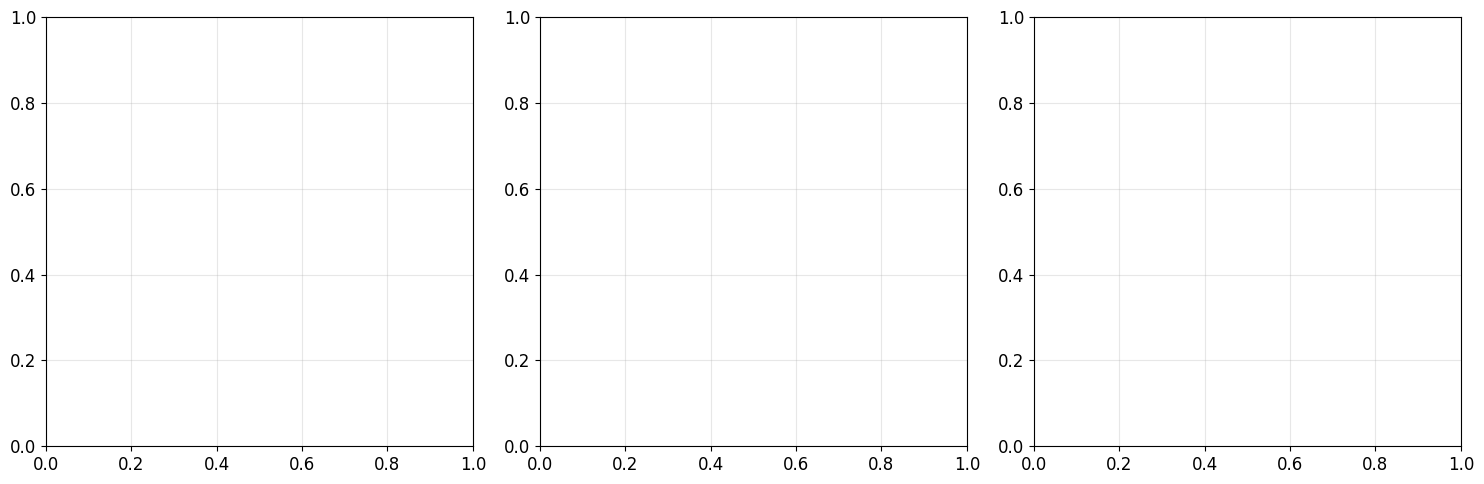

In [39]:
# Your code here
plt.figure(figsize=(15, 5))

# Task 1: Correlation with regression
plt.subplot(1, 3, 1)
# Your code here

# Task 2: Box plot by species
plt.subplot(1, 3, 2)
# Your code here

# Task 3: Histogram with normal overlay
plt.subplot(1, 3, 3)
# Your code here

plt.tight_layout()
plt.show()

## 7. Creating Publication-Quality Figures

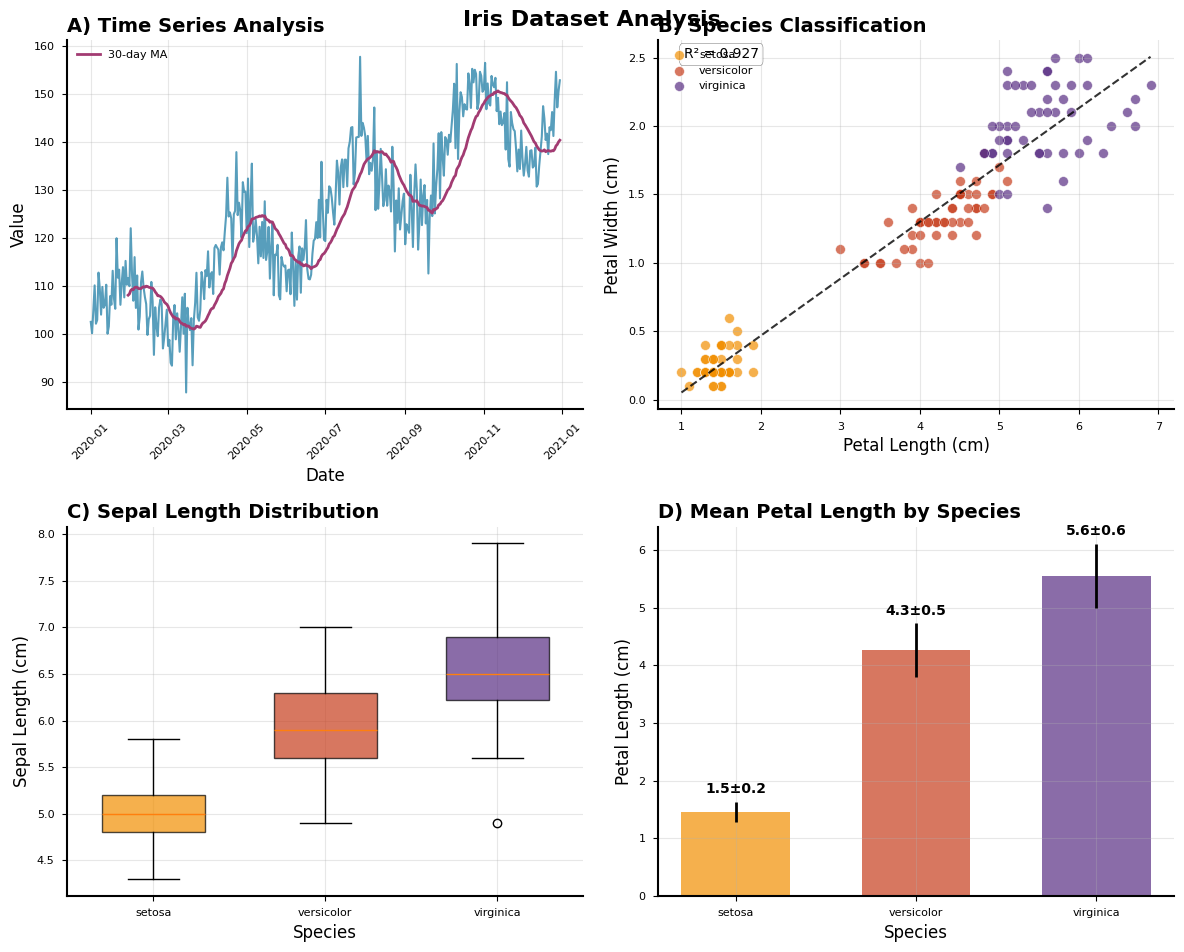

In [40]:
# Publication-quality figure
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.5,
    'lines.linewidth': 2,
    'figure.figsize': [12, 8],
    'axes.spines.top': False,
    'axes.spines.right': False
})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Panel A: Time series
axes[0, 0].plot(timeseries_df['date'], timeseries_df['value'], 
               color='#2E86AB', linewidth=1.5, alpha=0.8)
moving_avg = timeseries_df['value'].rolling(window=30).mean()
axes[0, 0].plot(timeseries_df['date'], moving_avg, 
               color='#A23B72', linewidth=2, label='30-day MA')

axes[0, 0].set_title('A) Time Series Analysis', fontsize=14, fontweight='bold', loc='left')
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Value', fontsize=12)
axes[0, 0].legend(frameon=False)
axes[0, 0].tick_params(axis='x', rotation=45)

# Panel B: Scatter plot with regression
colors_map = {'setosa': '#F18F01', 'versicolor': '#C73E1D', 'virginica': '#592E83'}
for species in iris_df['species_name'].unique():
    species_data = iris_df[iris_df['species_name'] == species]
    axes[0, 1].scatter(species_data['petal length (cm)'], 
                      species_data['petal width (cm)'],
                      c=colors_map[species], label=species, 
                      alpha=0.7, s=50, edgecolors='white', linewidth=0.5)

# Add regression line
x_reg = iris_df['petal length (cm)']
y_reg = iris_df['petal width (cm)']
slope, intercept, r_value, _, _ = stats.linregress(x_reg, y_reg)
line_x = np.linspace(x_reg.min(), x_reg.max(), 100)
line_y = slope * line_x + intercept
axes[0, 1].plot(line_x, line_y, 'k--', alpha=0.8, linewidth=1.5)

axes[0, 1].set_title('B) Species Classification', fontsize=14, fontweight='bold', loc='left')
axes[0, 1].set_xlabel('Petal Length (cm)', fontsize=12)
axes[0, 1].set_ylabel('Petal Width (cm)', fontsize=12)
axes[0, 1].legend(frameon=False, loc='upper left')
axes[0, 1].text(0.05, 0.95, f'R² = {r_value**2:.3f}', 
               transform=axes[0, 1].transAxes, fontsize=10,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Panel C: Box plot
box_data = [iris_df[iris_df['species_name'] == species]['sepal length (cm)'] 
           for species in iris_df['species_name'].unique()]

bp = axes[1, 0].boxplot(box_data, labels=iris_df['species_name'].unique(),
                       patch_artist=True, widths=0.6)

# Color the boxes
for patch, species in zip(bp['boxes'], iris_df['species_name'].unique()):
    patch.set_facecolor(colors_map[species])
    patch.set_alpha(0.7)

axes[1, 0].set_title('C) Sepal Length Distribution', fontsize=14, fontweight='bold', loc='left')
axes[1, 0].set_xlabel('Species', fontsize=12)
axes[1, 0].set_ylabel('Sepal Length (cm)', fontsize=12)

# Panel D: Bar plot with error bars
means = iris_df.groupby('species_name')['petal length (cm)'].mean()
stds = iris_df.groupby('species_name')['petal length (cm)'].std()

x_pos = np.arange(len(means))
bars = axes[1, 1].bar(x_pos, means.values, yerr=stds.values,
                     color=[colors_map[species] for species in means.index],
                     alpha=0.7, capsize=5, width=0.6,
                     error_kw={'elinewidth': 2, 'ecolor': 'black'})

axes[1, 1].set_title('D) Mean Petal Length by Species', fontsize=14, fontweight='bold', loc='left')
axes[1, 1].set_xlabel('Species', fontsize=12)
axes[1, 1].set_ylabel('Petal Length (cm)', fontsize=12)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(means.index)

# Add value labels on bars
for i, (mean, std) in enumerate(zip(means.values, stds.values)):
    axes[1, 1].text(i, mean + std + 0.1, f'{mean:.1f}±{std:.1f}', 
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Iris Dataset Analysis', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Save as high-resolution figure
# plt.savefig('iris_analysis.png', dpi=300, bbox_inches='tight')
# plt.savefig('iris_analysis.pdf', bbox_inches='tight')

plt.show()

# Reset style
plt.style.use('default')

### Exercise 7: Publication Figure
Create a publication-quality figure with:
1. Multiple panels (A, B, C, D) with proper labeling
2. Consistent color scheme across panels
3. Professional typography and styling
4. Appropriate figure caption and layout
5. Error bars where appropriate

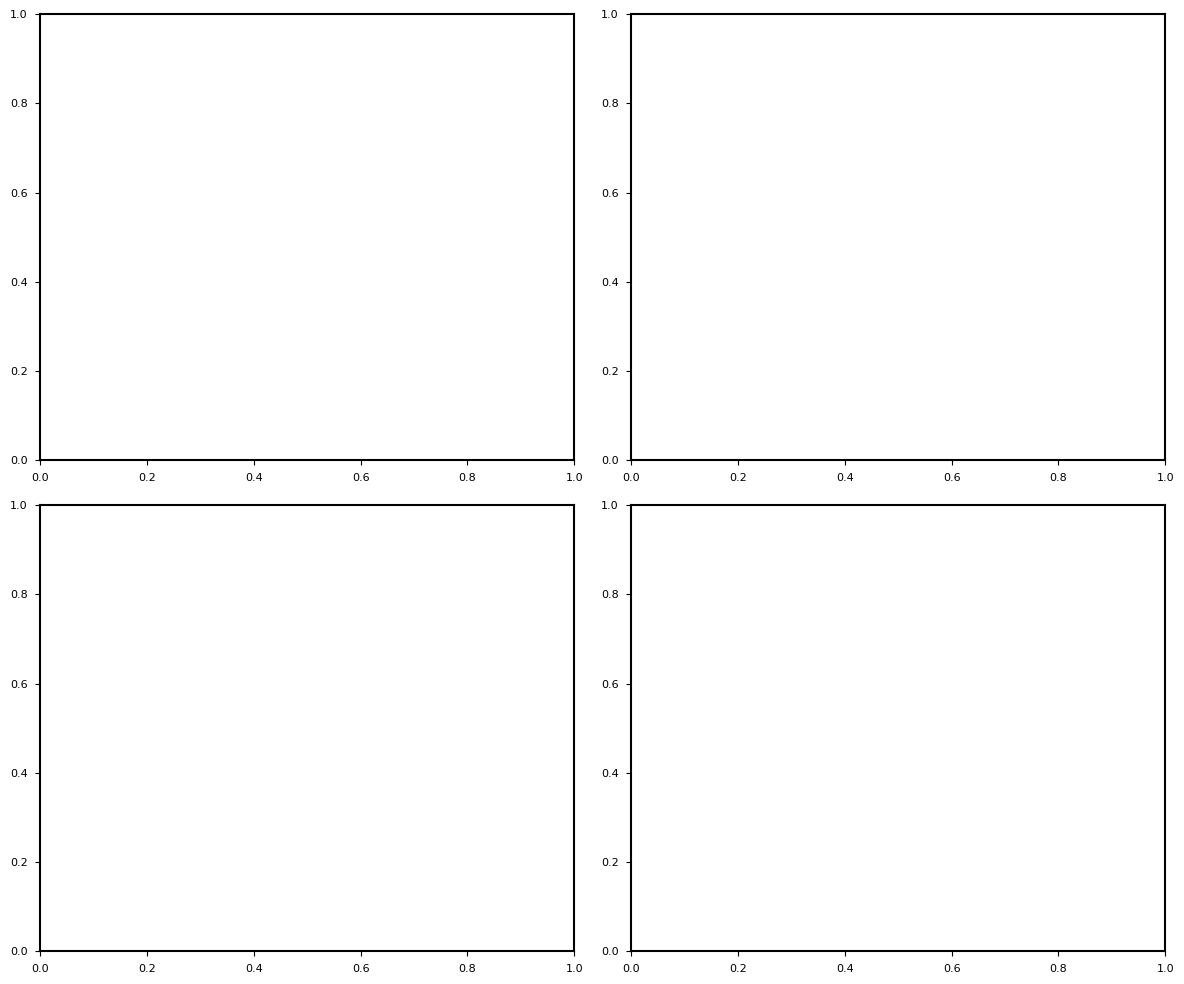

In [41]:
# Your code here - create a publication-quality figure
plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.size': 12,
    'axes.linewidth': 1.5,
    'figure.figsize': [12, 8]
})

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Your panels here

plt.tight_layout()
plt.show()

plt.style.use('default')  # Reset

## 8. Interactive Features and Animation Concepts

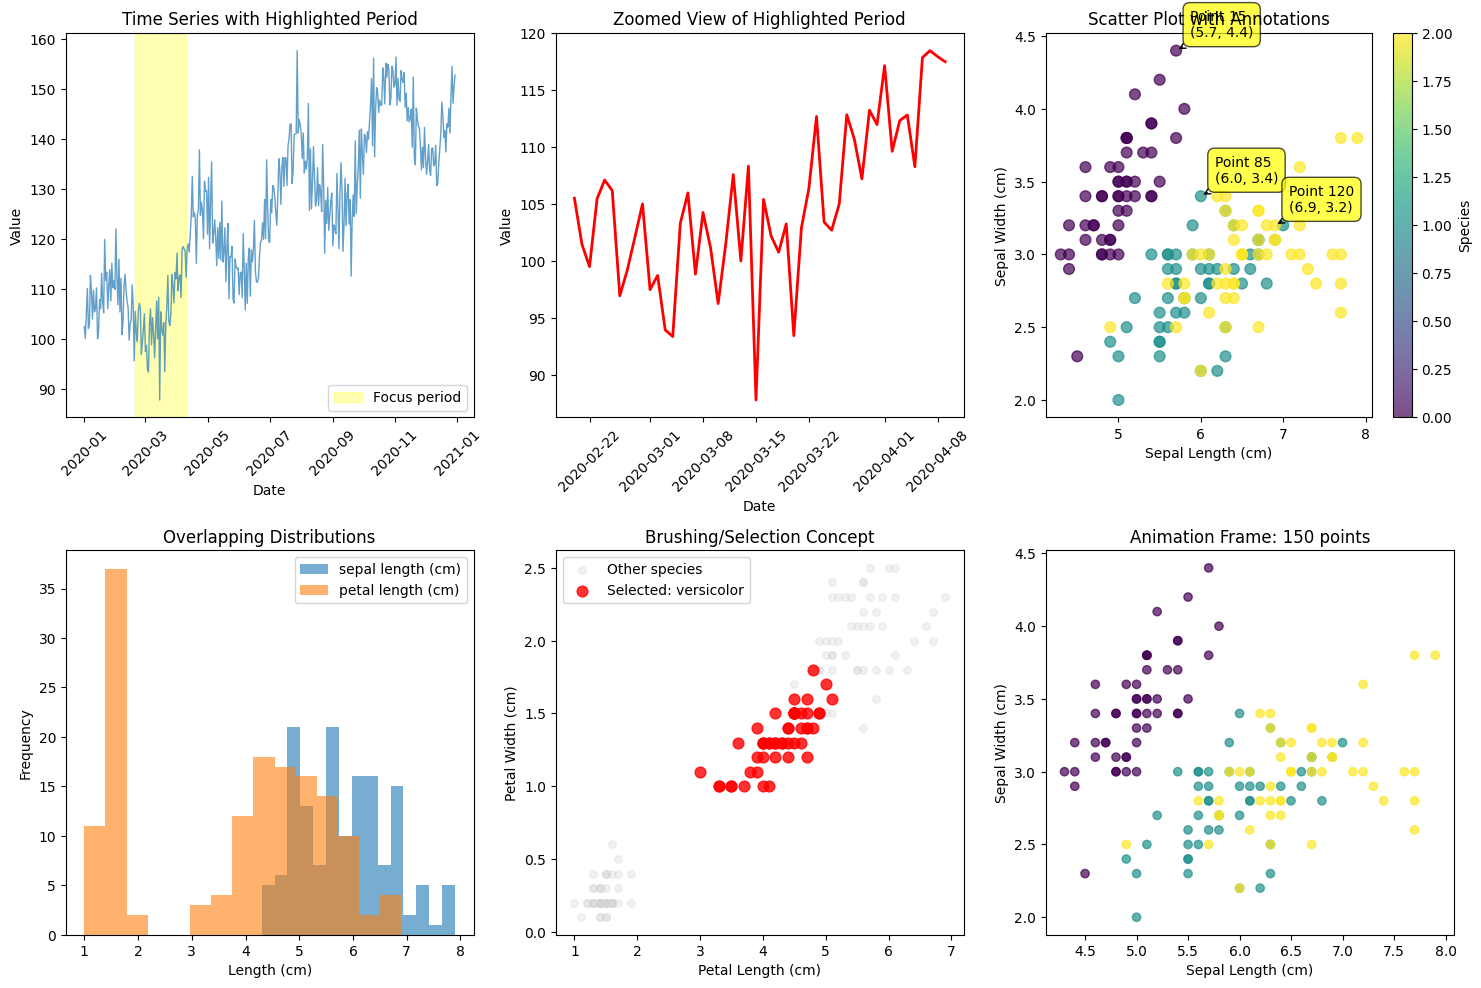

In [42]:
# Interactive-style plotting (static but with interactive concepts)
plt.figure(figsize=(15, 10))

# Zoomable subplot concept
plt.subplot(2, 3, 1)
plt.plot(timeseries_df['date'], timeseries_df['value'], linewidth=1, alpha=0.7)

# Highlight a specific period
highlight_start = 50
highlight_end = 100
plt.axvspan(timeseries_df['date'].iloc[highlight_start], 
           timeseries_df['date'].iloc[highlight_end], 
           alpha=0.3, color='yellow', label='Focus period')

plt.title('Time Series with Highlighted Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Zoomed view
plt.subplot(2, 3, 2)
zoom_data = timeseries_df.iloc[highlight_start:highlight_end]
plt.plot(zoom_data['date'], zoom_data['value'], linewidth=2, color='red')
plt.title('Zoomed View of Highlighted Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Hoverable-style annotations
plt.subplot(2, 3, 3)
scatter = plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 
                     c=iris_df['species'], cmap='viridis', s=60, alpha=0.7)

# Highlight specific points
interesting_points = iris_df.loc[[15, 85, 120]]  # Example interesting points
for idx, point in interesting_points.iterrows():
    plt.annotate(f'Point {idx}\n({point["sepal length (cm)"]:.1f}, {point["sepal width (cm)"]:.1f})',
                xy=(point['sepal length (cm)'], point['sepal width (cm)']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Scatter Plot with Annotations')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(scatter, label='Species')

# Multi-view concept
plt.subplot(2, 3, 4)
for i, measurement in enumerate(['sepal length (cm)', 'petal length (cm)']):
    plt.hist(iris_df[measurement], alpha=0.6, label=measurement, bins=15)
plt.title('Overlapping Distributions')
plt.xlabel('Length (cm)')
plt.ylabel('Frequency')
plt.legend()

# Linked brushing concept (simulated)
plt.subplot(2, 3, 5)
# Simulate selection of versicolor species
selected_species = 'versicolor'
selected_data = iris_df[iris_df['species_name'] == selected_species]
unselected_data = iris_df[iris_df['species_name'] != selected_species]

plt.scatter(unselected_data['petal length (cm)'], unselected_data['petal width (cm)'],
           c='lightgray', alpha=0.3, s=30, label='Other species')
plt.scatter(selected_data['petal length (cm)'], selected_data['petal width (cm)'],
           c='red', alpha=0.8, s=60, label=f'Selected: {selected_species}')

plt.title('Brushing/Selection Concept')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# Animation frame concept
plt.subplot(2, 3, 6)
# Show different "frames" of data evolution
cumulative_data = []
for i in range(0, len(iris_df), 30):
    cumulative_data.append(iris_df.iloc[:i+30])

# Show the "final frame"
final_frame = cumulative_data[-1]
plt.scatter(final_frame['sepal length (cm)'], final_frame['sepal width (cm)'],
           c=final_frame['species'], alpha=0.7, cmap='viridis')
plt.title(f'Animation Frame: {len(final_frame)} points')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()

## 9. Best Practices and Common Mistakes

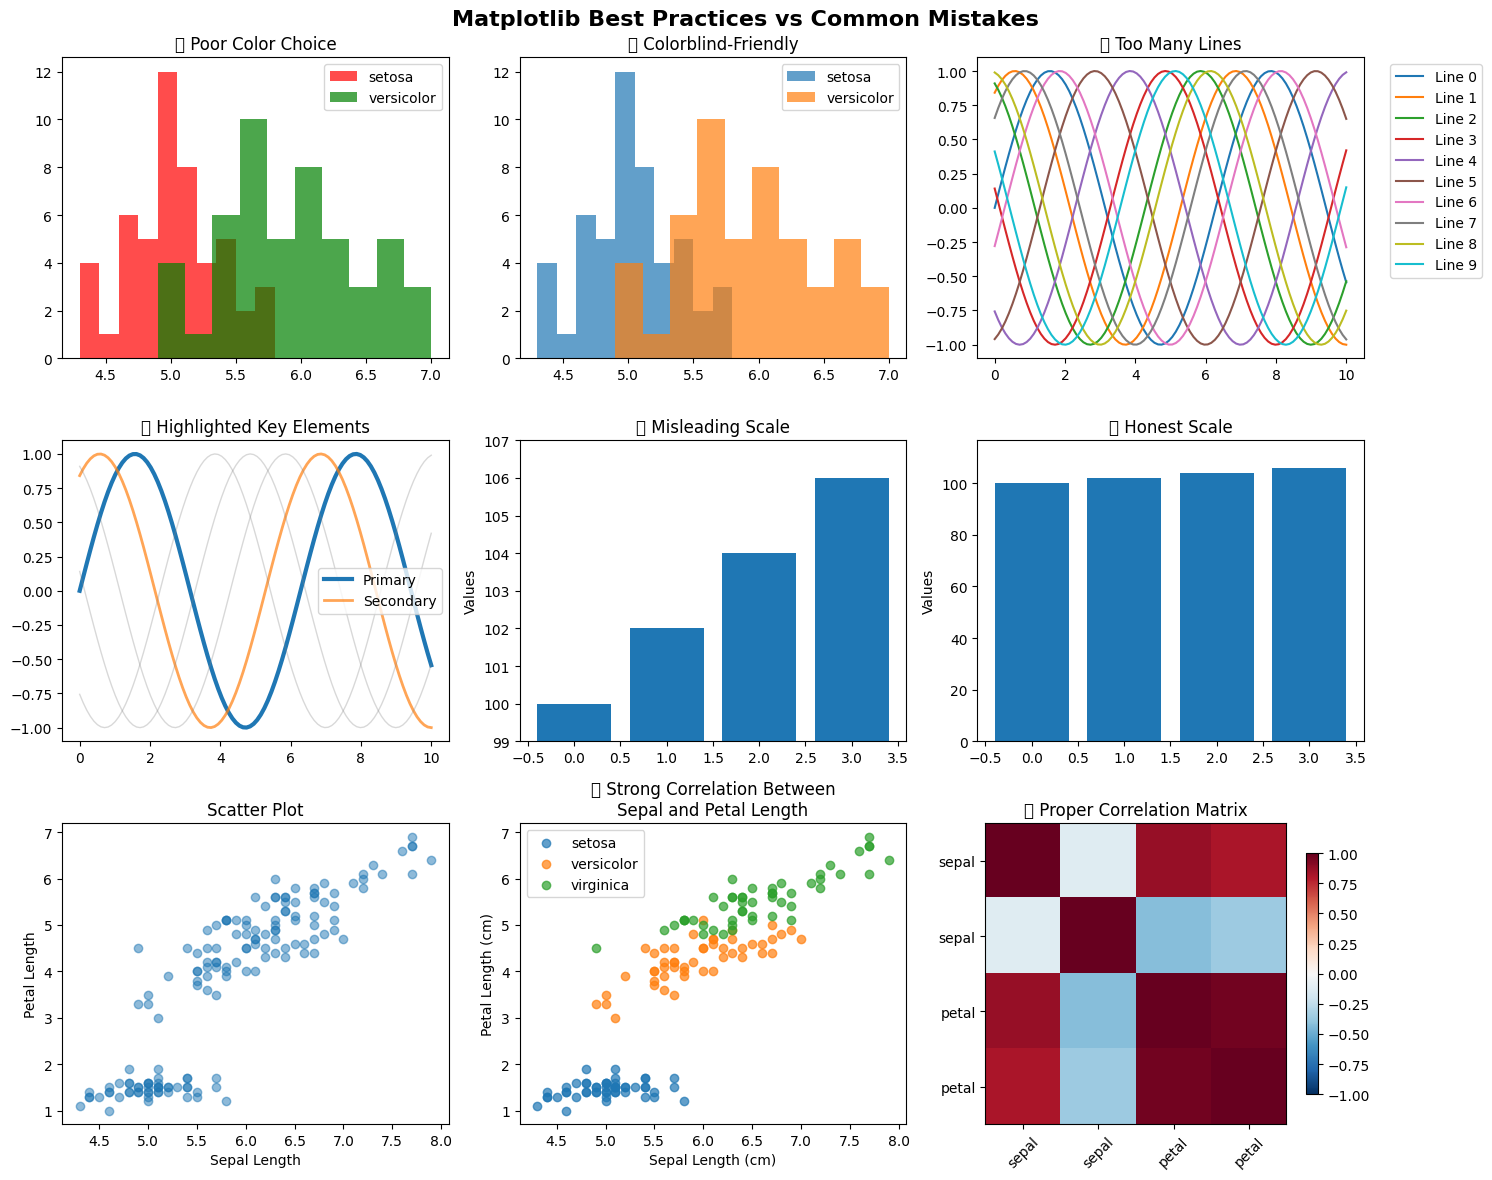

In [43]:
# Common mistakes and best practices
plt.figure(figsize=(15, 12))

# Mistake 1: Poor color choices
plt.subplot(3, 3, 1)
bad_colors = ['red', 'green']  # Bad for colorblind users
for i, species in enumerate(['setosa', 'versicolor']):
    data = iris_df[iris_df['species_name'] == species]['sepal length (cm)']
    plt.hist(data, alpha=0.7, color=bad_colors[i], label=species)
plt.title('❌ Poor Color Choice')
plt.legend()

# Fix: Colorblind-friendly colors
plt.subplot(3, 3, 2)
good_colors = ['#1f77b4', '#ff7f0e']  # Colorblind-friendly
for i, species in enumerate(['setosa', 'versicolor']):
    data = iris_df[iris_df['species_name'] == species]['sepal length (cm)']
    plt.hist(data, alpha=0.7, color=good_colors[i], label=species)
plt.title('✅ Colorblind-Friendly')
plt.legend()

# Mistake 2: Too many elements
plt.subplot(3, 3, 3)
x = np.linspace(0, 10, 100)
for i in range(10):
    plt.plot(x, np.sin(x + i), label=f'Line {i}')
plt.title('❌ Too Many Lines')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Fix: Focus on key elements
plt.subplot(3, 3, 4)
plt.plot(x, np.sin(x), label='Primary', linewidth=3)
plt.plot(x, np.sin(x + 1), label='Secondary', linewidth=2, alpha=0.7)
for i in range(2, 5):
    plt.plot(x, np.sin(x + i), color='gray', alpha=0.3, linewidth=1)
plt.title('✅ Highlighted Key Elements')
plt.legend()

# Mistake 3: Misleading scales
plt.subplot(3, 3, 5)
values = [100, 102, 104, 106]
plt.bar(range(4), values)
plt.ylim(99, 107)  # Truncated y-axis
plt.title('❌ Misleading Scale')
plt.ylabel('Values')

# Fix: Honest scales
plt.subplot(3, 3, 6)
plt.bar(range(4), values)
plt.ylim(0, max(values) * 1.1)  # Start from 0
plt.title('✅ Honest Scale')
plt.ylabel('Values')

# Mistake 4: No clear message
plt.subplot(3, 3, 7)
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Fix: Clear message and context
plt.subplot(3, 3, 8)
for species in iris_df['species_name'].unique():
    data = iris_df[iris_df['species_name'] == species]
    plt.scatter(data['sepal length (cm)'], data['petal length (cm)'], 
               label=species, alpha=0.7)
plt.title('✅ Strong Correlation Between\nSepal and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()

# Best practice: Proper aspect ratio and spacing
plt.subplot(3, 3, 9)
correlation_data = iris_df[['sepal length (cm)', 'sepal width (cm)', 
                           'petal length (cm)', 'petal width (cm)']].corr()
im = plt.imshow(correlation_data, cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal')
plt.colorbar(im, shrink=0.8)
plt.title('✅ Proper Correlation Matrix')
plt.xticks(range(len(correlation_data.columns)), 
          [col.split()[0] for col in correlation_data.columns], rotation=45)
plt.yticks(range(len(correlation_data.columns)), 
          [col.split()[0] for col in correlation_data.columns])

plt.suptitle('Matplotlib Best Practices vs Common Mistakes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Summary and Key Takeaways

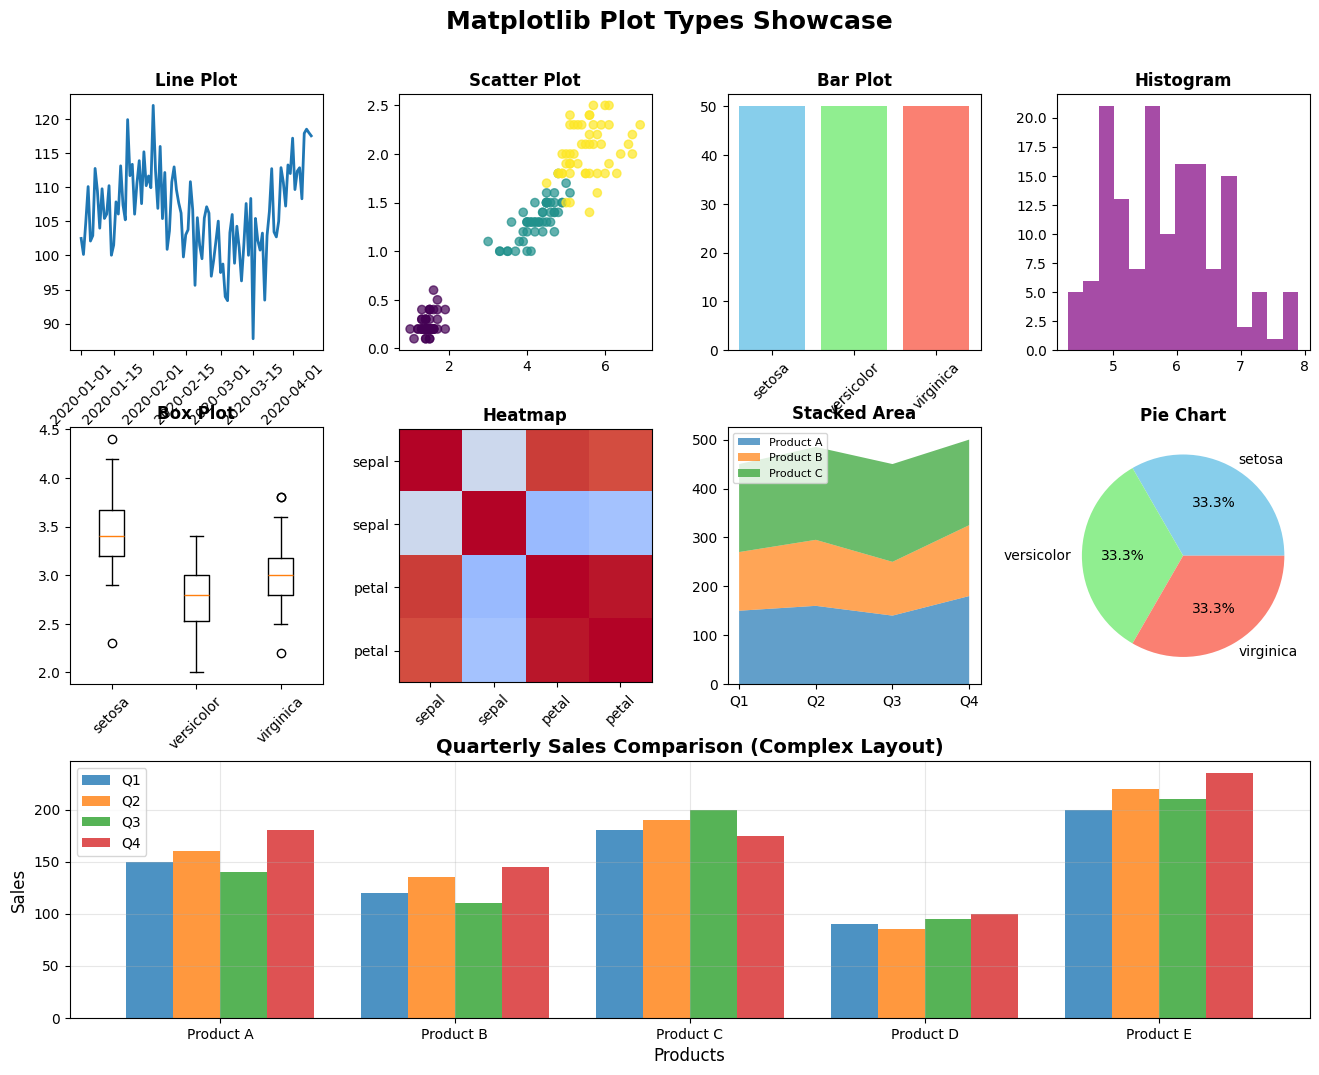

MATPLOTLIB VISUALIZATION LAB - SUMMARY

✅ Skills Mastered:
 1. Basic plot types (line, scatter, bar, histogram)
 2. Distribution visualizations (box plots, violin plots, 2D histograms)
 3. Time series visualization techniques
 4. Advanced customization (colors, styles, annotations)
 5. Complex subplot layouts with GridSpec
 6. Statistical plots and regression visualization
 7. Publication-quality figure creation
 8. Interactive concepts and best practices
 9. Common mistakes identification and fixes

📊 Key Matplotlib Concepts:
   • Figure and axes hierarchy
   • Pyplot vs object-oriented interface
   • Color maps and styling
   • Subplot organization and layout
   • Text, annotations, and legends
   • Axis customization and scaling
   • Publication standards and export formats

🎯 Best Practices Learned:
   ✓ Choose appropriate plot types for your data
   ✓ Use colorblind-friendly color palettes
   ✓ Maintain consistent styling across figures
   ✓ Include proper labels, titles, and lege

In [44]:
# Summary visualization showcasing different plot types
fig = plt.figure(figsize=(16, 12))
gs = plt.GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

# Line plot
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(timeseries_df['date'][:100], timeseries_df['value'][:100], linewidth=2)
ax1.set_title('Line Plot', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Scatter plot
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], 
           c=iris_df['species'], cmap='viridis', alpha=0.7)
ax2.set_title('Scatter Plot', fontweight='bold')

# Bar plot
ax3 = fig.add_subplot(gs[0, 2])
species_counts = iris_df['species_name'].value_counts()
ax3.bar(species_counts.index, species_counts.values, 
       color=['skyblue', 'lightgreen', 'salmon'])
ax3.set_title('Bar Plot', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

# Histogram
ax4 = fig.add_subplot(gs[0, 3])
ax4.hist(iris_df['sepal length (cm)'], bins=15, alpha=0.7, color='purple')
ax4.set_title('Histogram', fontweight='bold')

# Box plot
ax5 = fig.add_subplot(gs[1, 0])
box_data = [iris_df[iris_df['species_name'] == species]['sepal width (cm)'] 
           for species in iris_df['species_name'].unique()]
ax5.boxplot(box_data, labels=iris_df['species_name'].unique())
ax5.set_title('Box Plot', fontweight='bold')
ax5.tick_params(axis='x', rotation=45)

# Heatmap
ax6 = fig.add_subplot(gs[1, 1])
corr_matrix = iris_df[['sepal length (cm)', 'sepal width (cm)', 
                      'petal length (cm)', 'petal width (cm)']].corr()
im = ax6.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax6.set_title('Heatmap', fontweight='bold')
ax6.set_xticks(range(len(corr_matrix.columns)))
ax6.set_xticklabels([col.split()[0] for col in corr_matrix.columns], rotation=45)
ax6.set_yticks(range(len(corr_matrix.columns)))
ax6.set_yticklabels([col.split()[0] for col in corr_matrix.columns])

# Area plot
ax7 = fig.add_subplot(gs[1, 2])
monthly_sales = sales_df.T
ax7.stackplot(monthly_sales.index, monthly_sales['Product A'], 
             monthly_sales['Product B'], monthly_sales['Product C'],
             labels=['Product A', 'Product B', 'Product C'], alpha=0.7)
ax7.set_title('Stacked Area', fontweight='bold')
ax7.legend(loc='upper left', fontsize=8)

# Pie chart
ax8 = fig.add_subplot(gs[1, 3])
ax8.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
       colors=['skyblue', 'lightgreen', 'salmon'])
ax8.set_title('Pie Chart', fontweight='bold')

# Subplot spanning multiple columns for complex visualization
ax9 = fig.add_subplot(gs[2, :])
# Create a comprehensive visualization
x = np.arange(len(categories))
width = 0.2

for i, quarter in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    ax9.bar(x + i*width, sales_df[quarter], width, label=quarter, alpha=0.8)

ax9.set_title('Quarterly Sales Comparison (Complex Layout)', fontweight='bold', fontsize=14)
ax9.set_xlabel('Products', fontsize=12)
ax9.set_ylabel('Sales', fontsize=12)
ax9.set_xticks(x + width * 1.5)
ax9.set_xticklabels(categories)
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.suptitle('Matplotlib Plot Types Showcase', fontsize=18, fontweight='bold', y=0.95)
plt.show()

print("=" * 80)
print("MATPLOTLIB VISUALIZATION LAB - SUMMARY")
print("=" * 80)
print("\n✅ Skills Mastered:")
skills = [
    "Basic plot types (line, scatter, bar, histogram)",
    "Distribution visualizations (box plots, violin plots, 2D histograms)", 
    "Time series visualization techniques",
    "Advanced customization (colors, styles, annotations)",
    "Complex subplot layouts with GridSpec",
    "Statistical plots and regression visualization",
    "Publication-quality figure creation",
    "Interactive concepts and best practices",
    "Common mistakes identification and fixes"
]

for i, skill in enumerate(skills, 1):
    print(f"{i:2d}. {skill}")

print("\n📊 Key Matplotlib Concepts:")
concepts = [
    "Figure and axes hierarchy",
    "Pyplot vs object-oriented interface", 
    "Color maps and styling",
    "Subplot organization and layout",
    "Text, annotations, and legends",
    "Axis customization and scaling",
    "Publication standards and export formats"
]

for concept in concepts:
    print(f"   • {concept}")

print("\n🎯 Best Practices Learned:")
practices = [
    "Choose appropriate plot types for your data",
    "Use colorblind-friendly color palettes",
    "Maintain consistent styling across figures",
    "Include proper labels, titles, and legends",
    "Avoid misleading scales and representations",
    "Focus on clarity and message communication",
    "Test figures at different sizes and resolutions"
]

for practice in practices:
    print(f"   ✓ {practice}")

print("\n" + "=" * 80)
print("Excellent work on completing the Matplotlib visualization lab!")
print("You're now equipped to create professional data visualizations.")
print("=" * 80)

## Next Steps and Resources

### Advanced Topics to Explore
1. **3D Plotting**: Use `mplot3d` for three-dimensional visualizations
2. **Animation**: Create animated plots with `matplotlib.animation`
3. **Interactive Plots**: Combine with widgets for interactive dashboards
4. **Custom Artists**: Create custom plot elements and styles
5. **Geographic Data**: Use `cartopy` or `basemap` for map visualizations

### Complementary Libraries
- **Seaborn**: Statistical visualization built on matplotlib
- **Plotly**: Interactive web-based visualizations
- **Bokeh**: Interactive visualization for web applications
- **Altair**: Grammar of graphics for Python
- **Holoviews**: Declarative data visualization

### Resources for Continued Learning
- [Matplotlib Documentation](https://matplotlib.org/stable/)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Fundamentals of Data Visualization (Wilke)](https://clauswilke.com/dataviz/)
- [Effective Data Visualization](https://www.storytellingwithdata.com/)

### Practice Suggestions
1. Recreate figures from scientific papers in your field
2. Visualize real datasets from your domain of interest
3. Create a personal visualization style guide
4. Practice explaining your visualizations to others
5. Experiment with different chart types for the same data